In [28]:
import json
import requests
import jieba
import pandas as pd
import wordcloud
import numpy as np
import PIL.Image as image
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
# 请求头
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.106 Safari/537.36'}
# 评论地址
url="http://comment.api.163.com/api/v1/products/a2869674571f77b5a0867c3d71db5856/threads/FASTLQ7I00038FO9/comments/newList?ibc=newspc&limit=30&showLevelThreshold=72&headLimit=1&tailLimit=2&offset={}"
# 循环爬取
df = pd.DataFrame(None)
i = 0
while True:
    ret = requests.get(url.format(str(i*30)), headers=headers)
    text = ret.text
    result = json.loads(text)
    t = result['comments'].values()
    t = list(t)
    s = json_normalize(t)
    i += 1
    if len(s) == 0:
        print("爬取结束")
        break
    else:
        df = df.append(s)
        print("第{}页爬取完毕".format(i))

第1页爬取完毕
第2页爬取完毕
第3页爬取完毕
第4页爬取完毕
第5页爬取完毕
第6页爬取完毕
第7页爬取完毕
第8页爬取完毕
第9页爬取完毕
第10页爬取完毕
第11页爬取完毕
第12页爬取完毕
第13页爬取完毕
第14页爬取完毕
第15页爬取完毕
第16页爬取完毕
第17页爬取完毕
第18页爬取完毕
第19页爬取完毕
第20页爬取完毕
第21页爬取完毕
第22页爬取完毕
第23页爬取完毕
第24页爬取完毕
第25页爬取完毕
第26页爬取完毕
第27页爬取完毕
第28页爬取完毕
第29页爬取完毕
第30页爬取完毕
第31页爬取完毕
第32页爬取完毕
第33页爬取完毕
第34页爬取完毕
第35页爬取完毕
第36页爬取完毕
第37页爬取完毕
第38页爬取完毕
第39页爬取完毕
第40页爬取完毕
第41页爬取完毕
第42页爬取完毕
第43页爬取完毕
第44页爬取完毕
第45页爬取完毕
第46页爬取完毕
第47页爬取完毕
第48页爬取完毕
第49页爬取完毕
第50页爬取完毕
第51页爬取完毕
第52页爬取完毕
第53页爬取完毕
第54页爬取完毕
第55页爬取完毕
第56页爬取完毕
第57页爬取完毕
第58页爬取完毕
第59页爬取完毕
第60页爬取完毕
第61页爬取完毕
第62页爬取完毕
第63页爬取完毕
第64页爬取完毕
第65页爬取完毕
第66页爬取完毕
第67页爬取完毕
第68页爬取完毕
第69页爬取完毕
第70页爬取完毕
第71页爬取完毕
第72页爬取完毕
第73页爬取完毕
第74页爬取完毕
第75页爬取完毕
第76页爬取完毕
第77页爬取完毕
第78页爬取完毕
第79页爬取完毕
第80页爬取完毕
第81页爬取完毕
第82页爬取完毕
第83页爬取完毕
第84页爬取完毕
第85页爬取完毕
第86页爬取完毕
第87页爬取完毕
第88页爬取完毕
第89页爬取完毕
第90页爬取完毕
第91页爬取完毕
第92页爬取完毕
第93页爬取完毕
第94页爬取完毕
第95页爬取完毕
第96页爬取完毕
第97页爬取完毕
第98页爬取完毕
第99页爬取完毕
第100页爬取完毕
第101页爬取完毕
第102页爬取完毕
第103页爬取完毕
第104页爬取完毕
第105页爬取完毕
第106页爬取完毕
第107页爬取完毕
第108页爬取完毕
第109页爬取完毕


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

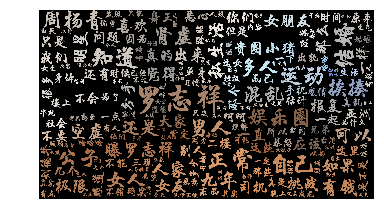

In [31]:
df=df.drop_duplicates('commentId').reset_index(drop=True)    
word = [
    y 
    for x in df.content.tolist() 
    for y in list(jieba.cut(x))
]
mask = np.array(image.open("C:/Users/hp/OneDrive/图片/新媒体素材/微信图片_20200310164048.jpg"))
stopword=[
    '一个','这个','不是','就是','没有','什么','这么','这样',
    '这种','怎么','斜眼','微笑','喷水','大笑','跟帖','br','现在'
]
wd=wordcloud.WordCloud(font_path='E:/汉仪程行简.ttf', stopwords=stopword, mask=mask, collocations=False)
wd=wd.generate(",".join(word))
image_colors = wordcloud.ImageColorGenerator(mask)
wd.recolor(color_func=image_colors)
plt.imshow(wd)
plt.axis('off')
plt.show()